# Usage

Download your iteration csv files under ./data/iterations. Edit the conditions on dfS and execute.

In [1]:
import os
import numpy as np
import pandas as pd
from math import exp
from matplotlib.collections import LineCollection
import matplotlib.pyplot as plt
import matplotlib.animation as animation

TRACK_DATA = './data/reinvent2018track.csv'
ITERATION_DATA_FOLDER = r"./data/iterations"


def getPathXY():
    path = pd.read_csv(TRACK_DATA, header=None)
    pathList = path.values.tolist()
    X, Y = [item[0] * 100 for item in pathList], [item[1] * 100 for item in pathList]
    return X, Y


def getPDInfo(excelname, sheetname):
    dataAll = pd.read_excel(excelname, sheet_name=sheetname)
    timeSet = set(dataAll.episode.tolist())
    return dataAll, timeSet


def getTimesXYSBySheetName(dataAll, timeIndex):
    data = dataAll[dataAll.episode == timeIndex]
    x, y, tstamp, colorListSelectSpeed, colorListSelectReward, speedL, rewardList = [x * 100 for x in
                                                                                     data.X.values.tolist()], [y * 100
                                                                                                               for y in
                                                                                                               data.Y.values.tolist()], [
        t * 0.3 for t in data.tstamp.values.tolist()], [t for t in data.color.values.tolist()][1:], [t for t in
                                                                                                     data.Rcolor.values.tolist()][
                                                                                                    1:], [t for t in
                                                                                                          data.throttle.values.tolist()][
                                                                                                         1:], [t for t
                                                                                                               in
                                                                                                               data.reward.values.tolist()][
                                                                                                              1:]
    tstampDelta = [tstamp[i + 1] - tstamp[i] for i in range(len(tstamp) - 1)]
    return x, y, tstampDelta, colorListSelectSpeed, colorListSelectReward, speedL, rewardList


def DrawTrack(fig, ex, ey, tstamp, colorListSelectSpeed, colorListSelectReward, speedL,
              rewardList):  # 39  0.387   63.43
    ims = []
    for i in range(len(ex) - 1):
        plt.title('speed:' + str(round(speedL[i], 2)) + '\nreward:' + str(round(rewardList[i], 3)))
        plt.xlabel('Env: re:Invent 2018\nunite:cm')
        im = plt.plot(ex[0:i + 1], ey[0:i + 1], color=colorListSelectSpeed[i], linewidth=4)
        ims.append(im)
        # plt.plot(xs, ys,color=color,linewidth=12.365) # 车宽算出来12.365cm
        plt.pause(tstamp[i])
    # ani = animation.ArtistAnimation(fig, ims, repeat_delay=1000)
    # ani.save("1.gif", writer='pillow')
    return ims


def speed2Color(speed, speedList, colorList):
    for index, p in enumerate(speedList):
        if speed <= p:
            return colorList[index]
    else:
        return colorList[0]


def reward2Color(reward, rewardList, colorList):
    if reward > 2:
        return 'red'
    elif reward >= 1:
        return 'orangered'
    else:
        return 'green'

def speed2Color(speed):
    match speed:
        case value if value < 1:
            return '#058800'
        case value if value >= 1 and value < 1.5:
            return '#bef100'
        case value if value >= 1.5 and value < 2:
            return '#fdfb00'
        case value if value >= 2 and value < 2.5:
            return '#ff4ff2'
        case value if value >= 2.5 and value < 3:
            return '#ff4016'
        case value if value >= 3:
            return '#d60012'

def print_iteration(episode=None, conditions=None):
    '''
    Episode is the episode index.
    Conditions is the query string to the dataframe.
    '''
    X, Y = getPathXY()
    plt.axis([-100, max(X) + 100, -100, max(Y) + 100])
    # plt.ion()
    plt.scatter(X, Y, color='#313D46', linewidth=38)
    fileList = [x for x in os.listdir(ITERATION_DATA_FOLDER) if x.lower().endswith('.csv') and x.startswith('0')]
    if len(fileList) == 1:
        df = pd.read_csv(os.path.join(ITERATION_DATA_FOLDER, fileList[0]))
        df.episode, df.steps, df.closest_waypoint = df.episode.map(int), df.steps.map(float).map(
            int), df.closest_waypoint.map(int)
        df.X, df.Y, df.throttle, df.reward, df.progress, df.track_len, df.tstamp = df.X.map(float), df.Y.map(
            float), df.throttle.map(float), df.reward.map(float), df.progress.map(float), df.track_len.map(
            float), df.tstamp.map(float)
        
        if episode:
            dfS = df[df.episode.isin([episode])].copy(deep=True)
        else:
            dfS = df.copy(deep=True)
            
        if conditions:
            dfS = dfS.query(conditions)
        
        # dfS = df[df.episode.isin([0])].copy(deep=True)
        ### 1. speed select
        # speedThrottle = 3.0
        # Lx,Ly = [100*x for x in dfS[dfS.throttle < speedThrottle].X.tolist()],[100*y for y in dfS[dfS.throttle < speedThrottle].Y.tolist()]
        # plt.scatter(Lx, Ly,marker = 'o', color = 'green', s = 24)
        ### 2. progress
        progressRange = (0, 100)
        Lx, Ly = [100 * x for x in dfS.X.tolist()], [100 * y for y in dfS.Y.tolist()]
        
        color_list = [speed2Color(eachThrottle) for eachThrottle in dfS['throttle']]
        plt.scatter(Lx, Ly, marker='o', color=color_list, s=12)
        # plt.show()
    else:
        print('CSV file not unique!')


    


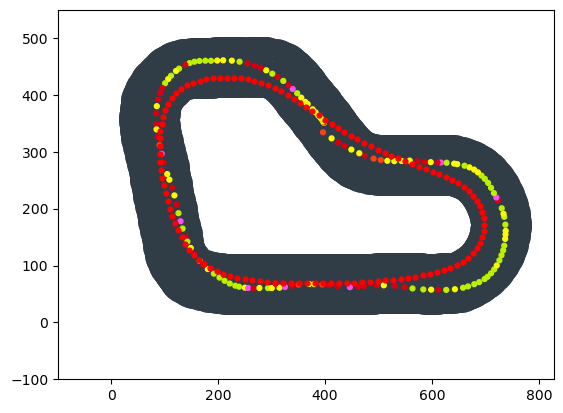

In [12]:
OPTIMIZED_WAYPOINTS = [
        [3.06664, 0.69989],
        [3.21372, 0.69357],
        [3.36169, 0.6893],
        [3.51032, 0.68657],
        [3.65944, 0.68518],
        [3.80869, 0.68499],
        [3.9577, 0.68593],
        [4.10629, 0.688],
        [4.25437, 0.69122],
        [4.40189, 0.69562],
        [4.54878, 0.70129],
        [4.69495, 0.7083],
        [4.84035, 0.71677],
        [4.9849, 0.7268],
        [5.12852, 0.73849],
        [5.27111, 0.75197],
        [5.41256, 0.76741],
        [5.55265, 0.78511],
        [5.69115, 0.80542],
        [5.82783, 0.82863],
        [5.96225, 0.85532],
        [6.09384, 0.88621],
        [6.22194, 0.92207],
        [6.34568, 0.96381],
        [6.46387, 1.01256],
        [6.57482, 1.06969],
        [6.67653, 1.13638],
        [6.76588, 1.21406],
        [6.83839, 1.3035],
        [6.8965, 1.40041],
        [6.94112, 1.50274],
        [6.96947, 1.60974],
        [6.97707, 1.71948],
        [6.96702, 1.82873],
        [6.94149, 1.93565],
        [6.90175, 2.03894],
        [6.84699, 2.13674],
        [6.77532, 2.22592],
        [6.69013, 2.30621],
        [6.59411, 2.37815],
        [6.48935, 2.44258],
        [6.37761, 2.50053],
        [6.26056, 2.55329],
        [6.13955, 2.60203],
        [6.01585, 2.648],
        [5.89082, 2.69257],
        [5.76067, 2.73919],
        [5.63058, 2.78629],
        [5.5006, 2.83412],
        [5.37081, 2.88295],
        [5.2413, 2.93305],
        [5.11223, 2.98473],
        [4.9838, 3.03838],
        [4.85635, 3.09451],
        [4.73023, 3.15374],
        [4.60596, 3.21695],
        [4.48296, 3.2828],
        [4.36104, 3.35081],
        [4.24006, 3.42061],
        [4.11988, 3.49191],
        [4.00046, 3.56448],
        [3.88179, 3.63809],
        [3.76397, 3.71247],
        [3.64724, 3.7873],
        [3.53105, 3.86073],
        [3.41419, 3.93239],
        [3.29624, 4.00105],
        [3.17677, 4.06545],
        [3.0554, 4.12417],
        [2.93169, 4.17515],
        [2.80549, 4.21581],
        [2.67785, 4.24822],
        [2.5493, 4.27301],
        [2.42021, 4.29067],
        [2.29093, 4.30153],
        [2.16175, 4.30562],
        [2.03303, 4.30283],
        [1.90519, 4.29292],
        [1.7788, 4.27535],
        [1.65459, 4.24957],
        [1.53376, 4.21418],
        [1.41797, 4.16786],
        [1.30974, 4.10893],
        [1.21287, 4.03538],
        [1.13093, 3.94692],
        [1.06435, 3.84609],
        [1.01121, 3.73603],
        [0.96999, 3.61869],
        [0.93956, 3.49541],
        [0.91891, 3.36729],
        [0.90708, 3.23527],
        [0.90334, 3.10018],
        [0.90681, 2.9629],
        [0.91698, 2.82419],
        [0.93341, 2.68483],
        [0.95571, 2.54557],
        [0.98342, 2.40706],
        [1.01626, 2.26986],
        [1.05392, 2.13444],
        [1.09624, 2.00121],
        [1.14311, 1.87057],
        [1.19482, 1.7431],
        [1.25158, 1.61938],
        [1.31382, 1.50015],
        [1.38221, 1.38643],
        [1.45757, 1.27943],
        [1.54096, 1.18072],
        [1.63386, 1.09253],
        [1.7384, 1.01844],
        [1.85098, 0.955],
        [1.97002, 0.90067],
        [2.09459, 0.85453],
        [2.2239, 0.81579],
        [2.35729, 0.78373],
        [2.49419, 0.75767],
        [2.63406, 0.73695],
        [2.77639, 0.72086],
        [2.92074, 0.70874],
        [3.06664, 0.69989]
    ]


if __name__ == '__main__':
    X, Y = getPathXY()
    plt.axis([-100, max(X) + 100, -100, max(Y) + 100])
    # plt.ion()
    plt.scatter(X, Y, color='#313D46', linewidth=38)
    
    x_opt = [eachPoint[0]*100 for eachPoint in OPTIMIZED_WAYPOINTS]
    y_opt = [eachPoint[1]*100 for eachPoint in OPTIMIZED_WAYPOINTS]
    
    
#     condotions = 'steer < 10 and steer > -10 and throttle>2'
    
    print_iteration(90)
    plt.scatter(x_opt, y_opt, marker='o', color='red', s=12)
    
    plt.show()
    
    
    